In [1]:
import pandas as pd
import glob
import codecs
from pandas import Series, DataFrame

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import Adam,RMSprop,SGD
from keras.utils import np_utils
from keras import optimizers,regularizers
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#圧力_温度_配管ID.csvの読み込み
data1 = pd.read_csv("drive/My Drive/mdb/test/C50/圧力_温度_配管ID.csv", encoding='shift_jis')
data1

,From,To,材質,配管 ID,呼び径 (mm),ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 自動_1,ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_2,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時許容応力 (N/mm2)
0,A00,A01,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00
1,A01,A02 N,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00
2,A02 N,A02 F,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00
3,A02 F,A03 N,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00
4,A03 N,A03 F,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,I01 F,I03,STPT370-S,P100S40,100,1.77,375,1,4.750695,1,0.17450,1,89.00
334,I03,I04,STPT370-S,P100S40,100,1.77,375,1,4.750695,1,0.17450,1,89.00
335,I04,I05,STPT370-S,P100S40,100,0.18,362,1,4.544906,1,0.17632,1,90.56
336,I05,I06,STPT370-S,P125S40,125,0.18,362,1,4.544906,1,0.17632,1,90.56


In [4]:
#配管特性.csvの読み込み
data2 = pd.read_csv('drive/My Drive/mdb/test/C50/配管特性.csv',encoding='shift_jis')
data2

,配管ID,ﾀｸﾞ ﾅﾝﾊﾞｰ,呼び径 (mm),実外径 (mm),ｽｹｼﾞｭｰﾙ,肉厚 (mm),腐れ代 (mm),製作公差 (mm),保温厚さ (mm),保温材質,保温材密度 (kg/m3),外装板厚 (mm),外装板材質,外装板密度 (kg/m3),ﾗｲﾆﾝｸﾞ厚さ (mm),ﾗｲﾆﾝｸﾞ密度 (kg/m3),ﾗｲﾝ ｸﾗｽ,流体比重,配管材質,最低温度の警告,溶接E係数,溶接W係数 自動,溶接W係数,応力振幅 低減係数,常温時許容応力 (N/mm2),最小降伏点(Sy) (N/mm2),引張強さ(Su) (N/mm2),縦弾性係数 (E6 N/mm2),周方向弾性係数 (E6 N/mm2),せん断弾性係数 (E6 N/mm2),密度 (kg/m3),ﾎﾟｱｿﾝ比
0,E500T13,,500,508.0,NS,12.700000,0,1.5870,115,Other,201.29,0,,,0,,BC22,0,SB410,0,1,,,1,103.00000,225,410,0.202927,0.202927,0.078049,7850,0.3
1,P450T13,,450,457.2,NS,12.700000,0,1.5870,115,Other,201.29,0,,,0,,BC22,0,SB410,0,1,,,1,103.00000,225,410,0.202927,0.202927,0.078049,7850,0.3
2,P600T13,,600,609.6,NS,12.700000,0,1.5870,115,Other,201.25,0,,,0,,BC22,0,SB410,0,1,,,1,103.00000,225,410,0.202927,0.202927,0.078049,7850,0.3
3,E400T13,,400,406.4,NS,12.700000,0,1.5870,115,Other,201.34,0,,,0,,BC22,0,SB410,0,1,,,1,103.00000,225,410,0.202927,0.202927,0.078049,7850,0.3
4,P450S40,,450,457.2,40,14.300000,0,1.7880,115,Other,201.29,0,,,0,,BC23,0,SB410,0,1,,,1,103.00000,225,410,0.202927,0.202927,0.078049,7850,0.3
5,P550STD,,550,558.8,STD,9.500000,0,1.1880,115,Other,201.25,0,,,0,,BC24,0,SB410,0,1,,,1,103.00000,225,410,0.202927,0.202927,0.078049,7850,0.3
6,P700STD,,700,711.2,STD,9.500000,0,1.1880,115,Other,201.22,0,,,0,,BC24,0,SB410,0,1,,,1,103.00000,225,410,0.202927,0.202927,0.078049,7850,0.3
7,P600STD,,600,609.6,STD,9.500000,0,1.1880,115,Other,201.25,0,,,0,,BC24,0,SB410,0,1,,,1,103.00000,225,410,0.202927,0.202927,0.078049,7850,0.3
8,P250S40,,250,267.4,40,9.300000,0,1.1625,65,Other,201.47,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.00000,215,370,0.202927,0.202927,0.078049,7850,0.3
9,P150S40,,150,165.2,40,7.099999,0,0.8875,65,Other,201.33,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.00000,215,370,0.202927,0.202927,0.078049,7850,0.3


In [5]:
#圧力_温度_配管ID.csvのデータの配管IDに合わせて配管特性.csvのデータを結合
data1_frame = DataFrame(data1)
data2_frame = DataFrame(data2)
data12 = pd.merge(data1_frame,data2_frame,how='left',left_on='配管 ID',right_on = '配管ID')
data12

,From,To,材質,配管 ID,呼び径 (mm)_x,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 自動_1,ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_2,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時許容応力 (N/mm2),配管ID,ﾀｸﾞ ﾅﾝﾊﾞｰ,呼び径 (mm)_y,実外径 (mm),ｽｹｼﾞｭｰﾙ,肉厚 (mm),腐れ代 (mm),製作公差 (mm),保温厚さ (mm),保温材質,保温材密度 (kg/m3),外装板厚 (mm),外装板材質,外装板密度 (kg/m3),ﾗｲﾆﾝｸﾞ厚さ (mm),ﾗｲﾆﾝｸﾞ密度 (kg/m3),ﾗｲﾝ ｸﾗｽ,流体比重,配管材質,最低温度の警告,溶接E係数,溶接W係数 自動,溶接W係数,応力振幅 低減係数,常温時許容応力 (N/mm2),最小降伏点(Sy) (N/mm2),引張強さ(Su) (N/mm2),縦弾性係数 (E6 N/mm2),周方向弾性係数 (E6 N/mm2),せん断弾性係数 (E6 N/mm2),密度 (kg/m3),ﾎﾟｱｿﾝ比
0,A00,A01,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00,P250S40,,250,267.4,40,9.3,0,1.1625,65,Other,201.47,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
1,A01,A02 N,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00,P250S40,,250,267.4,40,9.3,0,1.1625,65,Other,201.47,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
2,A02 N,A02 F,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00,P250S40,,250,267.4,40,9.3,0,1.1625,65,Other,201.47,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
3,A02 F,A03 N,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00,P250S40,,250,267.4,40,9.3,0,1.1625,65,Other,201.47,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
4,A03 N,A03 F,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00,P250S40,,250,267.4,40,9.3,0,1.1625,65,Other,201.47,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,I01 F,I03,STPT370-S,P100S40,100,1.77,375,1,4.750695,1,0.17450,1,89.00,P100S40,,100,114.3,40,6.0,0,0.7500,65,Other,201.53,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
334,I03,I04,STPT370-S,P100S40,100,1.77,375,1,4.750695,1,0.17450,1,89.00,P100S40,,100,114.3,40,6.0,0,0.7500,65,Other,201.53,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
335,I04,I05,STPT370-S,P100S40,100,0.18,362,1,4.544906,1,0.17632,1,90.56,P100S40,,100,114.3,40,6.0,0,0.7500,65,Other,201.53,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
336,I05,I06,STPT370-S,P125S40,125,0.18,362,1,4.544906,1,0.17632,1,90.56,P125S40,,125,139.8,40,6.6,0,0.8250,65,Other,201.53,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3


In [6]:
#'To'データの削除
data12 = data12.drop("To",axis=1)
for col_name in data12.columns:
    print(col_name,data12[col_name].dtype)

#結合後のデータ種類
data12

From object
材質 object
配管 ID object
呼び径 (mm)_x int64
ｹｰｽ 1 圧力 (N/mm2) float64
ｹｰｽ 1 温度 (deg C) int64
ｹｰｽ 1 自動_1 int64
ｹｰｽ 1 線膨張量 (mm/m) float64
ｹｰｽ 1 自動_2 int64
ｹｰｽ 1 運転時弾性係数 (E6 N/mm2) float64
ｹｰｽ 1 自動_3 int64
ｹｰｽ 1 運転時許容応力 (N/mm2) float64
配管ID object
ﾀｸﾞ ﾅﾝﾊﾞｰ object
呼び径 (mm)_y int64
実外径 (mm) float64
ｽｹｼﾞｭｰﾙ object
肉厚 (mm) float64
腐れ代 (mm) int64
製作公差 (mm) float64
保温厚さ (mm) int64
保温材質 object
保温材密度 (kg/m3) float64
外装板厚 (mm) int64
外装板材質 object
外装板密度 (kg/m3) object
ﾗｲﾆﾝｸﾞ厚さ (mm) int64
ﾗｲﾆﾝｸﾞ密度 (kg/m3) object
ﾗｲﾝ ｸﾗｽ object
流体比重 int64
配管材質 object
最低温度の警告 int64
溶接E係数 int64
溶接W係数 自動 object
溶接W係数 object
応力振幅 低減係数 int64
常温時許容応力 (N/mm2) float64
最小降伏点(Sy) (N/mm2) int64
引張強さ(Su) (N/mm2) int64
縦弾性係数 (E6 N/mm2) float64
周方向弾性係数 (E6 N/mm2) float64
せん断弾性係数 (E6 N/mm2) float64
密度 (kg/m3) int64
ﾎﾟｱｿﾝ比 float64


,From,材質,配管 ID,呼び径 (mm)_x,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 自動_1,ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_2,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時許容応力 (N/mm2),配管ID,ﾀｸﾞ ﾅﾝﾊﾞｰ,呼び径 (mm)_y,実外径 (mm),ｽｹｼﾞｭｰﾙ,肉厚 (mm),腐れ代 (mm),製作公差 (mm),保温厚さ (mm),保温材質,保温材密度 (kg/m3),外装板厚 (mm),外装板材質,外装板密度 (kg/m3),ﾗｲﾆﾝｸﾞ厚さ (mm),ﾗｲﾆﾝｸﾞ密度 (kg/m3),ﾗｲﾝ ｸﾗｽ,流体比重,配管材質,最低温度の警告,溶接E係数,溶接W係数 自動,溶接W係数,応力振幅 低減係数,常温時許容応力 (N/mm2),最小降伏点(Sy) (N/mm2),引張強さ(Su) (N/mm2),縦弾性係数 (E6 N/mm2),周方向弾性係数 (E6 N/mm2),せん断弾性係数 (E6 N/mm2),密度 (kg/m3),ﾎﾟｱｿﾝ比
0,A00,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00,P250S40,,250,267.4,40,9.3,0,1.1625,65,Other,201.47,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
1,A01,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00,P250S40,,250,267.4,40,9.3,0,1.1625,65,Other,201.47,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
2,A02 N,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00,P250S40,,250,267.4,40,9.3,0,1.1625,65,Other,201.47,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
3,A02 F,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00,P250S40,,250,267.4,40,9.3,0,1.1625,65,Other,201.47,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
4,A03 N,STPT370-S,P250S40,250,1.77,375,1,4.750695,1,0.17450,1,89.00,P250S40,,250,267.4,40,9.3,0,1.1625,65,Other,201.47,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,I01 F,STPT370-S,P100S40,100,1.77,375,1,4.750695,1,0.17450,1,89.00,P100S40,,100,114.3,40,6.0,0,0.7500,65,Other,201.53,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
334,I03,STPT370-S,P100S40,100,1.77,375,1,4.750695,1,0.17450,1,89.00,P100S40,,100,114.3,40,6.0,0,0.7500,65,Other,201.53,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
335,I04,STPT370-S,P100S40,100,0.18,362,1,4.544906,1,0.17632,1,90.56,P100S40,,100,114.3,40,6.0,0,0.7500,65,Other,201.53,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3
336,I05,STPT370-S,P125S40,125,0.18,362,1,4.544906,1,0.17632,1,90.56,P125S40,,125,139.8,40,6.6,0,0.8250,65,Other,201.53,0,,,0,,BC22,0,STPT370-S,0,1,,,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3


In [7]:
#'配管ID'などの文字データのダミー化
data12_dummy = pd.get_dummies(data12[data12.columns[data12.columns != 'From']])
data12_dummy['From'] = data12['From']
print(data12_dummy['配管 ID_P250S40'])
data12_dummy

0      1
1      1
2      1
3      1
4      1
      ..
333    0
334    0
335    0
336    0
337    0
Name: 配管 ID_P250S40, Length: 338, dtype: uint8


,呼び径 (mm)_x,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 自動_1,ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_2,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時許容応力 (N/mm2),呼び径 (mm)_y,実外径 (mm),肉厚 (mm),腐れ代 (mm),製作公差 (mm),保温厚さ (mm),保温材密度 (kg/m3),外装板厚 (mm),ﾗｲﾆﾝｸﾞ厚さ (mm),流体比重,最低温度の警告,溶接E係数,応力振幅 低減係数,常温時許容応力 (N/mm2),最小降伏点(Sy) (N/mm2),引張強さ(Su) (N/mm2),縦弾性係数 (E6 N/mm2),周方向弾性係数 (E6 N/mm2),せん断弾性係数 (E6 N/mm2),密度 (kg/m3),ﾎﾟｱｿﾝ比,材質_SB410,材質_STPT370-S,配管 ID_E350S40,配管 ID_E400T13,配管 ID_E500T13,配管 ID_P100S40,配管 ID_P125S40,配管 ID_P150S40,配管 ID_P200S40,配管 ID_P250S40,配管 ID_P350S40,配管 ID_P450S40,配管 ID_P450STD,配管 ID_P450T13,配管 ID_P550STD,配管 ID_P600STD,配管 ID_P600T13,配管 ID_P700STD,配管ID_E350S40,配管ID_E400T13,配管ID_E500T13,配管ID_P100S40,配管ID_P125S40,配管ID_P150S40,配管ID_P200S40,配管ID_P250S40,配管ID_P350S40,配管ID_P450S40,配管ID_P450STD,配管ID_P450T13,配管ID_P550STD,配管ID_P600STD,配管ID_P600T13,配管ID_P700STD,ﾀｸﾞ ﾅﾝﾊﾞｰ_,ｽｹｼﾞｭｰﾙ_40,ｽｹｼﾞｭｰﾙ_NS,ｽｹｼﾞｭｰﾙ_STD,保温材質_Other,外装板材質_,外装板密度 (kg/m3)_,ﾗｲﾆﾝｸﾞ密度 (kg/m3)_,ﾗｲﾝ ｸﾗｽ_BC22,ﾗｲﾝ ｸﾗｽ_BC23,ﾗｲﾝ ｸﾗｽ_BC24,配管材質_SB410,配管材質_STPT370-S,溶接W係数 自動_,溶接W係数_,From
0,250,1.77,375,1,4.750695,1,0.17450,1,89.00,250,267.4,9.3,0,1.1625,65,201.47,0,0,0,0,1,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,A00
1,250,1.77,375,1,4.750695,1,0.17450,1,89.00,250,267.4,9.3,0,1.1625,65,201.47,0,0,0,0,1,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,A01
2,250,1.77,375,1,4.750695,1,0.17450,1,89.00,250,267.4,9.3,0,1.1625,65,201.47,0,0,0,0,1,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,A02 N
3,250,1.77,375,1,4.750695,1,0.17450,1,89.00,250,267.4,9.3,0,1.1625,65,201.47,0,0,0,0,1,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,A02 F
4,250,1.77,375,1,4.750695,1,0.17450,1,89.00,250,267.4,9.3,0,1.1625,65,201.47,0,0,0,0,1,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,A03 N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,100,1.77,375,1,4.750695,1,0.17450,1,89.00,100,114.3,6.0,0,0.7500,65,201.53,0,0,0,0,1,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,I01 F
334,100,1.77,375,1,4.750695,1,0.17450,1,89.00,100,114.3,6.0,0,0.7500,65,201.53,0,0,0,0,1,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,I03
335,100,0.18,362,1,4.544906,1,0.17632,1,90.56,100,114.3,6.0,0,0.7500,65,201.53,0,0,0,0,1,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,I04
336,125,0.18,362,1,4.544906,1,0.17632,1,90.56,125,139.8,6.6,0,0.8250,65,201.53,0,0,0,0,1,1,92.0,215,370,0.202927,0.202927,0.078049,7850,0.3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,I05


In [8]:
#Support.csvの読み込み
data_out = pd.read_csv("drive/My Drive/mdb/test/C50/Support.csv",encoding='shift_jis')
data_out

,Internal1,Internal2,PointOrder,CombinationOrder,Segment,Point,Name,Tag,Type,Nominal,Combination,GlobalFX,GlobalFY,GlobalFZ,GlobalFR,GlobalDX,GlobalDY,GlobalDZ,GlobalDR,LocalXLabel,LocalFX,LocalDX,GapX,LocalYLabel,LocalFY,LocalDY,GapY,LocalZLabel,LocalFZ,LocalDZ,GapZ,Stiffness,Friction,ColdLoad,CoordX,CoordY,CoordZ
0,66008,393214,1069,1,A,A42,A42 1,NaN,Guide,250.0,Gravity{1},-26.44,-88.09,-2644.50,2646.10,0.010000,-5.030299e-08,-0.000185,0.010000,down,2644.64,1.510130e-06,0.0,rght,88.09,5.030299e-08,0.0,forw,0.0,0.010000,0.0,1.751000e+09,0.0,0.0,1688199.0,1738500.0,22663.00
1,131544,393214,1070,2,A,A42,A42 1,NaN,Guide,250.0,Thermal 1{1},-81.65,-12710.36,-8164.69,15107.02,-22.410000,-7.257806e-06,0.220000,22.410000,down,8165.10,4.662396e-06,0.0,rght,12710.36,7.257806e-06,0.0,back,0.0,22.410000,0.0,1.751000e+09,0.0,0.0,1688199.0,1738500.0,22663.00
2,197080,393214,1071,3,A,A42,A42 1,NaN,Guide,250.0,GT1{1},-108.10,-12798.45,-10809.20,16752.64,-22.390000,-7.308109e-06,0.220000,22.390000,down,10809.74,6.172526e-06,0.0,rght,12798.45,7.308109e-06,0.0,back,0.0,22.390000,0.0,1.751000e+09,0.0,0.0,1688199.0,1738500.0,22663.00
3,66069,8060926,1072,1,A,A57,A57 1,NaN,V - Stop,250.0,Gravity{1},0.00,0.00,-3358.91,3358.91,0.010000,5.000000e-02,-0.000002,0.050000,down,3358.91,1.917992e-06,0.0,+X,0.00,1.000000e-02,0.0,+Y,0.0,0.050000,0.0,1.751000e+09,0.0,0.0,1692198.6,1738500.0,22622.99
4,131605,8060926,1073,2,A,A57,A57 1,NaN,V - Stop,250.0,Thermal 1{1},0.00,0.00,-3491.66,3491.66,-3.450000,8.270000e+00,-0.000002,8.960000,down,3491.66,1.993795e-06,0.0,-X,0.00,3.450000e+00,0.0,+Y,0.0,8.270000,0.0,1.751000e+09,0.0,0.0,1692198.6,1738500.0,22622.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,131597,6488062,1259,2,H,H26,H26 1,NaN,Guide,125.0,Thermal 1{1},11.37,4647.82,1137.21,4784.94,-30.300000,2.653980e-06,0.300000,30.300000,up,1137.27,6.494005e-07,0.0,left,4647.82,2.653980e-06,0.0,back,0.0,30.300000,0.0,1.751000e+09,0.0,0.0,1721649.1,1787001.6,14637.01
191,197133,6488062,1260,3,H,H26,H26 1,NaN,Guide,125.0,GT1{1},-4.02,4654.69,-402.04,4672.02,-31.130000,2.657900e-06,0.310000,31.130000,down,402.06,2.295829e-07,0.0,left,4654.69,2.657900e-06,0.0,back,0.0,31.130000,0.0,1.751000e+09,0.0,0.0,1721649.1,1787001.6,14637.01
192,66062,6619134,1261,1,H,H27,H27 1,NaN,Guide,125.0,Gravity{1},0.00,-12.43,-5750.19,5750.20,0.000053,-7.101131e-09,-0.000003,0.000053,down,5750.19,3.283447e-06,0.0,rght,12.43,7.101131e-09,0.0,forw,0.0,0.000053,0.0,1.751000e+09,0.0,0.0,1726931.6,1787002.1,12799.99
193,131598,6619134,1262,2,H,H27,H27 1,NaN,Guide,125.0,Thermal 1{1},0.00,-6287.56,-2116.39,6634.20,-7.270000,-3.590295e-06,-0.000001,7.270000,down,2116.39,1.208492e-06,0.0,rght,6287.56,3.590295e-06,0.0,back,0.0,7.270000,0.0,1.751000e+09,0.0,0.0,1726931.6,1787002.1,12799.99


In [9]:
#使用したい "Point","Type"データのみにする
for col_name in data_out.columns:
    if col_name != "Point" and col_name != "Type" :
        data_out = data_out.drop(col_name,axis=1)
data_out

,Point,Type
0,A42,Guide
1,A42,Guide
2,A42,Guide
3,A57,V - Stop
4,A57,V - Stop
...,...,...
190,H26,Guide
191,H26,Guide
192,H27,Guide
193,H27,Guide


In [10]:
#重複しているデータの削除
data_out = data_out.drop_duplicates()
data_out

,Point,Type
0,A42,Guide
3,A57,V - Stop
6,A43,Guide
9,A44,Guide
12,A56,V - Stop
...,...,...
180,H23,Guide
183,H29,V - Stop
186,H25,V - Stop
189,H26,Guide


In [11]:
#入力データと出力データを'Point'データで結合
data_press_type = pd.merge(data12_dummy,data_out,how = "outer",left_on = 'From',right_on='Point')
data_press_type

,呼び径 (mm)_x,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 自動_1,ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_2,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時許容応力 (N/mm2),呼び径 (mm)_y,実外径 (mm),肉厚 (mm),腐れ代 (mm),製作公差 (mm),保温厚さ (mm),保温材密度 (kg/m3),外装板厚 (mm),ﾗｲﾆﾝｸﾞ厚さ (mm),流体比重,最低温度の警告,溶接E係数,応力振幅 低減係数,常温時許容応力 (N/mm2),最小降伏点(Sy) (N/mm2),引張強さ(Su) (N/mm2),縦弾性係数 (E6 N/mm2),周方向弾性係数 (E6 N/mm2),せん断弾性係数 (E6 N/mm2),密度 (kg/m3),ﾎﾟｱｿﾝ比,材質_SB410,材質_STPT370-S,配管 ID_E350S40,配管 ID_E400T13,配管 ID_E500T13,配管 ID_P100S40,配管 ID_P125S40,配管 ID_P150S40,配管 ID_P200S40,配管 ID_P250S40,...,配管 ID_P450STD,配管 ID_P450T13,配管 ID_P550STD,配管 ID_P600STD,配管 ID_P600T13,配管 ID_P700STD,配管ID_E350S40,配管ID_E400T13,配管ID_E500T13,配管ID_P100S40,配管ID_P125S40,配管ID_P150S40,配管ID_P200S40,配管ID_P250S40,配管ID_P350S40,配管ID_P450S40,配管ID_P450STD,配管ID_P450T13,配管ID_P550STD,配管ID_P600STD,配管ID_P600T13,配管ID_P700STD,ﾀｸﾞ ﾅﾝﾊﾞｰ_,ｽｹｼﾞｭｰﾙ_40,ｽｹｼﾞｭｰﾙ_NS,ｽｹｼﾞｭｰﾙ_STD,保温材質_Other,外装板材質_,外装板密度 (kg/m3)_,ﾗｲﾆﾝｸﾞ密度 (kg/m3)_,ﾗｲﾝ ｸﾗｽ_BC22,ﾗｲﾝ ｸﾗｽ_BC23,ﾗｲﾝ ｸﾗｽ_BC24,配管材質_SB410,配管材質_STPT370-S,溶接W係数 自動_,溶接W係数_,From,Point,Type
0,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A00,NaN,NaN
1,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A01,NaN,NaN
2,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A02 N,NaN,NaN
3,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A02 F,NaN,NaN
4,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A03 N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,125.0,0.18,362.0,1.0,4.544906,1.0,0.17632,1.0,90.56,125.0,139.8,6.6,0.0,0.8250,65.0,201.53,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,I06,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A21 M,Spr. Hgr
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [12]:
#'Support.csv'の'type'データの確認
data_series = Series(data_press_type['Type'])
pd.Series.value_counts(data_series)

Guide       35
V - Stop    17
Spr. Hgr    12
Spr. Can     1
Name: Type, dtype: int64

In [13]:
#文字データなのでダミー化
data_press_type.at[data_press_type['Type'] == "Guide",'Type'] = 1
data_press_type.at[data_press_type['Type'] == "V - Stop",'Type'] = 2
data_press_type.at[data_press_type['Type'] == "Spr. Hgr",'Type'] = 3
data_press_type.at[data_press_type['Type'] == "Spr. Can",'Type'] = 4
data_test_press = data_press_type.fillna(0)
data_series = Series(data_test_press['Type'])
print(pd.Series.value_counts(data_series))
data_test_press = data_test_press[data_test_press["呼び径 (mm)_x"] != 0]
data_test_press

0    277
1     35
2     17
3     12
4      1
Name: Type, dtype: int64


,呼び径 (mm)_x,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 自動_1,ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_2,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時許容応力 (N/mm2),呼び径 (mm)_y,実外径 (mm),肉厚 (mm),腐れ代 (mm),製作公差 (mm),保温厚さ (mm),保温材密度 (kg/m3),外装板厚 (mm),ﾗｲﾆﾝｸﾞ厚さ (mm),流体比重,最低温度の警告,溶接E係数,応力振幅 低減係数,常温時許容応力 (N/mm2),最小降伏点(Sy) (N/mm2),引張強さ(Su) (N/mm2),縦弾性係数 (E6 N/mm2),周方向弾性係数 (E6 N/mm2),せん断弾性係数 (E6 N/mm2),密度 (kg/m3),ﾎﾟｱｿﾝ比,材質_SB410,材質_STPT370-S,配管 ID_E350S40,配管 ID_E400T13,配管 ID_E500T13,配管 ID_P100S40,配管 ID_P125S40,配管 ID_P150S40,配管 ID_P200S40,配管 ID_P250S40,...,配管 ID_P450STD,配管 ID_P450T13,配管 ID_P550STD,配管 ID_P600STD,配管 ID_P600T13,配管 ID_P700STD,配管ID_E350S40,配管ID_E400T13,配管ID_E500T13,配管ID_P100S40,配管ID_P125S40,配管ID_P150S40,配管ID_P200S40,配管ID_P250S40,配管ID_P350S40,配管ID_P450S40,配管ID_P450STD,配管ID_P450T13,配管ID_P550STD,配管ID_P600STD,配管ID_P600T13,配管ID_P700STD,ﾀｸﾞ ﾅﾝﾊﾞｰ_,ｽｹｼﾞｭｰﾙ_40,ｽｹｼﾞｭｰﾙ_NS,ｽｹｼﾞｭｰﾙ_STD,保温材質_Other,外装板材質_,外装板密度 (kg/m3)_,ﾗｲﾆﾝｸﾞ密度 (kg/m3)_,ﾗｲﾝ ｸﾗｽ_BC22,ﾗｲﾝ ｸﾗｽ_BC23,ﾗｲﾝ ｸﾗｽ_BC24,配管材質_SB410,配管材質_STPT370-S,溶接W係数 自動_,溶接W係数_,From,Point,Type
0,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A00,0,0
1,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A01,0,0
2,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A02 N,0,0
3,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A02 F,0,0
4,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A03 N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,100.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,100.0,114.3,6.0,0.0,0.7500,65.0,201.53,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,I01 F,0,0
334,100.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,100.0,114.3,6.0,0.0,0.7500,65.0,201.53,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,I03,0,0
335,100.0,0.18,362.0,1.0,4.544906,1.0,0.

In [14]:
np.random.seed(0) # 乱数を固定値で初期化し再現性を持たせる
X = data_test_press.drop(['From','Point','Type'],axis=1)
T = data_test_press['Type']
(n_samples,n_features)=X.shape
n_classes=len(np.unique(T))

print(n_features)

T = np_utils.to_categorical(T) # 数値を、位置に変換 [0,1,2] ==> [ [1,0,0],[0,1,0],[0,0,1] ]
train_x, test_x, train_t, test_t = train_test_split(X, T, train_size=0.7, test_size=0.3)

79


In [0]:
#モデル作成

model = Sequential()
model.add(Dense(100,activation="relu",input_shape=(n_features,)))
model.add(Dropout(0.2))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=n_classes,activation="softmax"))

from keras.utils import plot_model
plot_model(model,show_shapes=True, to_file='model.png')

model.summary()
model.compile(loss='mean_squared_error', optimizer=Adam(),metrics=["accuracy"])

In [16]:
#トレーニング

history=model.fit(X,T,epochs=600,batch_size=100,verbose=1,validation_data=(test_x,test_t))
result=model.predict_classes(X,verbose=0)





Train on 338 samples, validate on 102 samples
Epoch 1/600





338/338 [==============================] - 10s 29ms/step - loss: 0.3724 - acc: 0.0680 - val_loss: 0.3922 - val_acc: 0.0196
Epoch 2/600
338/338 [==============================] - 0s 76us/step - loss: 0.3564 - acc: 0.1065 - val_loss: 0.3922 - val_acc: 0.0196
Epoch 3/600
338/338 [==============================] - 0s 72us/step - loss: 0.3470 - acc: 0.1302 - val_loss: 0.3922 - val_acc: 0.0196
Epoch 4/600
338/338 [==============================] - 0s 71us/step - loss: 0.3096 - acc: 0.2249 - val_loss: 0.0667 - val_acc: 0.8333
Epoch 5/600
338/338 [==============================] - 0s 98us/step - loss: 0.2440 - acc: 0.3876 - val_loss: 0.0667 - val_acc: 0.8333
Epoch 6/600
338/338 [==============================] - 0s 78us/step - loss: 0.2202 - acc: 0.4438 - val_loss: 0.0667 - val_acc: 0.8333
Epoch 7/600
338/338 [==============================] - 0s 84us/step - loss: 0.1724 - acc: 0.5680 - val_loss: 0.0667 - val_acc: 0.8333
Epoch 8

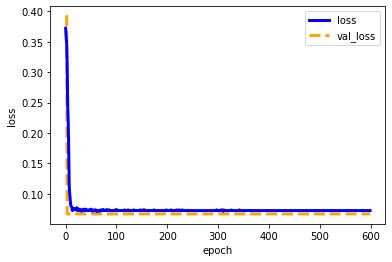

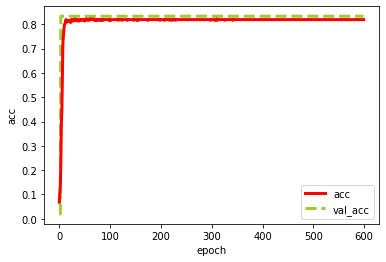

In [17]:
#以下で損失関数のグラフを描画
val_loss,=plt.plot(history.history["val_loss"],c="orange",ls="--",linewidth=3)
loss,=plt.plot(history.history["loss"],c="blue",linewidth=3)
plt.legend([loss,val_loss],["loss","val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
#accuracyをグラフ化
val_acc,=plt.plot(history.history["val_acc"],c="yellowgreen",ls="--",linewidth=3)
acc,=plt.plot(history.history["acc"],c="red",linewidth=3)
plt.legend([acc,val_acc],["acc","val_acc"])
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()